Point Gauss-Seidel

Number of iterations: 593


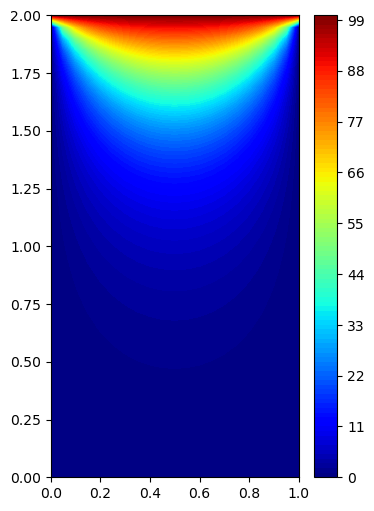

CPU times: total: 1.91 s
Wall time: 2.29 s


In [8]:
%%time
import numpy as np
import matplotlib.pyplot as plt

row, col = (41, 21)
T = np.zeros((row,col),dtype=float)
T[40,:] = 100
tolerance = 0.01
dx = 1/(col-1)
dy = 2/(row-1)
beta = dx/dy

error = 1
iter = 0
while error > tolerance:
    error = 0
    iter += 1
    for i in range(1,row-1):
        for j in range(1,col-1):
            T_old = T[i,j]
            T[i,j] = (T[i+1,j] + T[i-1,j] + beta**2*(T[i,j+1] + T[i,j-1]))/(2*(1+beta**2))
            error += np.abs(T[i,j]-T_old)
print('Number of iterations:',iter)
plt.figure(figsize=(4,6))
X,Y = np.meshgrid(np.linspace(0,1,col),np.linspace(0,2,row))
plt.contourf(X,Y,T,100,cmap='jet')
plt.colorbar()
plt.show()

Line Gauss-Seidel

Number of iterations: 300


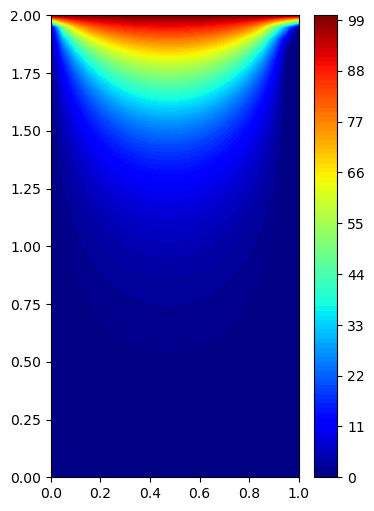

CPU times: total: 1.42 s
Wall time: 1.67 s


In [69]:
%%time
import numpy as np
import matplotlib.pyplot as plt

row, col = (41, 21)
T = np.zeros((row,col),dtype=float)
T[40,:] = 100
tolerance = 0.01
dx = 1/(col-1)
dy = 2/(row-1)
beta = dx/dy
def tridiagonal_solve(a, b, c, d):
    n = len(d)
    for i in range(1, n):
        m = a[i-1] / b[i-1]
        b[i] = b[i] - m * c[i-1]
        d[i] = d[i] - m * d[i-1]
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]
    return x

error = 1
iter = 0
a = np.zeros(col-3)
b = np.zeros(col-2)
c = np.zeros(col-3)
d = np.zeros(col-2)
while error > tolerance:
    error = 0
    iter += 1
    T_old = T.copy()
    for i in range(1,row-1):
        d[0] = -beta**2*(T[i-1,1] + T[i+1,1]) - T[i,0]
        d[-1] = -beta**2*(T[i-1,col-2] + T[i+1,col-2]) - T[i,col-1]
        b[0] = -2*(1+beta**2)
        b[-1] = -2*(1+beta**2)
        for j in range(1,col-3):
            a[j-1] = 1
            b[j] = -2*(1+beta**2)
            c[j-1] = 1
            d[j] = -beta**2*(T[i-1,j+1] + T[i+1,j+1])
        T[i][1:col - 1] = tridiagonal_solve(a, b, c, d)
    for i in range(1,row-1):
        for j in range(1,col-1):
            error += np.abs(T[i,j]-T_old[i,j])

print('Number of iterations:',iter)
plt.figure(figsize=(4,6))
X,Y = np.meshgrid(np.linspace(0,1,col),np.linspace(0,2,row))
plt.contourf(X,Y,T,100,cmap='jet')
plt.colorbar()
plt.show()

PSOR

Number of iterations: 72


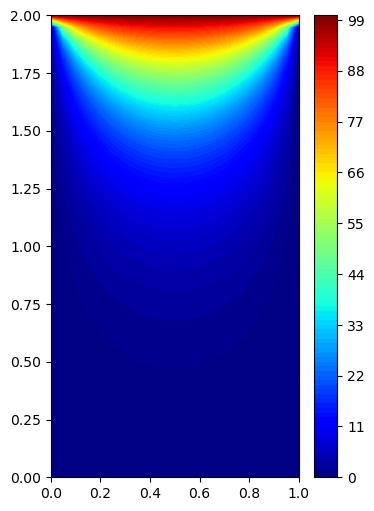

CPU times: total: 359 ms
Wall time: 572 ms


In [23]:
%%time
import numpy as np
import matplotlib.pyplot as plt

row, col = (41, 21)
T = np.zeros((row,col),dtype=float)
T[40,:] = 100
tolerance = 0.01
dx = 1/(col-1)
dy = 2/(row-1)
beta = dx/dy
omega = 1.781

error = 1
iter = 0
while error > tolerance:
    error = 0
    iter += 1
    for i in range(1,row-1):
        for j in range(1,col-1):
            T_old = T[i,j]
            T[i,j] = (1 - omega) * T[i,j] + omega * ((T[i+1,j] + T[i-1,j] + beta**2*(T[i,j+1] + T[i,j-1]))/(2*(1+beta**2)))
            error += np.abs(T[i,j]-T_old)
print('Number of iterations:',iter)
plt.figure(figsize=(4,6))
X,Y = np.meshgrid(np.linspace(0,1,col),np.linspace(0,2,row))
plt.contourf(X,Y,T,100,cmap='jet')
plt.colorbar()
plt.show()

LSOR

Number of iterations: 53


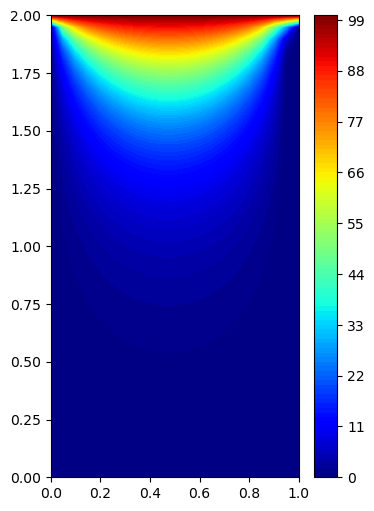

CPU times: total: 453 ms
Wall time: 573 ms


In [91]:
%%time
import numpy as np
import matplotlib.pyplot as plt

row, col = (41, 21)
T = np.zeros((row,col), dtype=np.float64)
T[40,:] = 100
tolerance = 0.01
omega = 1.275
dx = 1/(col-1)
dy = 2/(row-1)
beta = dx/dy
def tridiagonal_solve(a, b, c, d):
    n = len(d)
    for i in range(1, n):
        m = a[i-1] / b[i-1]
        b[i] = b[i] - m * c[i-1]
        d[i] = d[i] - m * d[i-1]
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]
    return x

error = 1
iter = 0
a = np.zeros(col-3, dtype=np.float64)
b = np.zeros(col-2, dtype=np.float64)
c = np.zeros(col-3, dtype=np.float64)
d = np.zeros(col-2, dtype=np.float64)
while error > tolerance:
    error = 0
    iter += 1
    T_old = T.copy()
    for i in range(1,row-1):
        d[0] = -(beta**2)*omega*(T[i-1,1] + T[i+1,1]) - omega*T[i,0] - (1-omega)*2*(1+beta**2)*T[i,1]
        d[-1] = -(beta**2)*omega*(T[i-1,col-2] + T[i+1,col-2]) - omega*T[i,col-1] - (1-omega)*2*(1+beta**2)*T[i,col-2]
        b[0] = -2*(1+beta**2)
        b[-1] = -2*(1+beta**2)
        for j in range(1,col-3):
            a[j-1] = omega
            b[j] = -2*(1+beta**2)
            c[j-1] = omega
            d[j] = -(beta**2)*omega*(T[i-1,j+1] + T[i+1,j+1]) - (1-omega)*2*(1+beta**2)*T[i,j+1]
        T[i][1:col - 1] = tridiagonal_solve(a, b, c, d)
    for i in range(1,row-1):
        for j in range(1,col-1):
            error += np.abs(T[i,j]-T_old[i,j])

print('Number of iterations:',iter)
plt.figure(figsize=(4,6))
X,Y = np.meshgrid(np.linspace(0,1,col),np.linspace(0,2,row))
plt.contourf(X,Y,T,100,cmap='jet')
plt.colorbar()
plt.show()

ADI

Number of iterations: 144


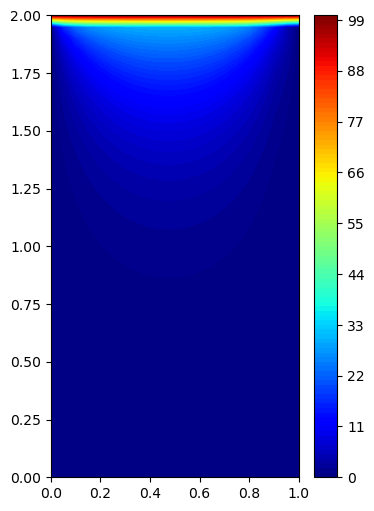

CPU times: total: 1.12 s
Wall time: 1.41 s


In [94]:
%%time
import numpy as np
import matplotlib.pyplot as plt

row, col = (41, 21)
T = np.zeros((row,col),dtype=float)
T[40,:] = 100
tolerance = 0.01
dx = 1/(col-1)
dy = 2/(row-1)
beta = dx/dy
def tridiagonal_solve(a, b, c, d):
    n = len(d)
    for i in range(1, n):
        m = a[i-1] / b[i-1]
        b[i] = b[i] - m * c[i-1]
        d[i] = d[i] - m * d[i-1]
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]
    return x

error = 1
iter = 0
a = np.zeros(col-3)
b = np.zeros(col-2)
c = np.zeros(col-3)
d = np.zeros(col-2)
a1 = np.zeros(row-3)
b1 = np.zeros(row-2)
c1 = np.zeros(row-3)
d1 = np.zeros(row-2)
while error > tolerance:
    error = 0
    iter += 1
    T_old = T.copy()
    for i in range(1,row-1):
        d[0] = -(beta**2)*(T[i-1,1] + T[i+1,1]) - T[i,0]
        d[-1] = -(beta**2)*(T[i-1,col-2] + T[i+1,col-2]) - T[i,col-1]
        b[0] = -2*(1+beta**2)
        b[-1] = -2*(1+beta**2)
        for j in range(1,col-3):
            a[j-1] = 1
            b[j] = -2*(1+beta**2)
            c[j-1] = 1
            d[j] = -(beta**2)*(T[i-1,j+1] + T[i+1,j+1])
        T[i][1:col - 1] = tridiagonal_solve(a, b, c, d)
    for i in range(1,col-1):
        d1[0] = -(T[1,i-1] + T[1,i+1]) - T[0,i]*(beta**2)
        d1[-1] = -(T[row-2,i-1] + T[row-2,i+1]) - T[row-1,i]*(beta**2)
        b1[0] = -2*(1+beta**2)
        b1[-1] = -2*(1+beta**2)
        for j in range(1,row-2):
            a1[j-1] = beta**2
            b1[j] = -2*(1+beta**2)
            c1[j-1] = beta**2
            d1[j] = -(T[j+1,i-1] + T[j+1,i+1])
        T[1:row-1,i] = tridiagonal_solve(a1, b1, c1, d1) 
    for i in range(1,row-1):
        for j in range(1,col-1):
            error += np.abs(T[i,j]-T_old[i,j])

print('Number of iterations:',iter)
plt.figure(figsize=(4,6))
X,Y = np.meshgrid(np.linspace(0,1,col),np.linspace(0,2,row))
plt.contourf(X,Y,T,100,cmap='jet')
plt.colorbar()
plt.show()

ADI with relaxation

Number of iterations: 75


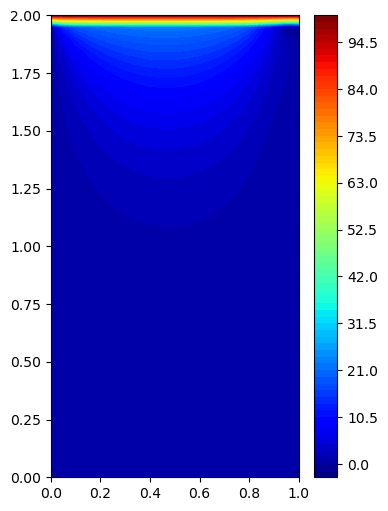

CPU times: total: 641 ms
Wall time: 971 ms


In [99]:
%%time
import numpy as np
import matplotlib.pyplot as plt

row, col = (41, 21)
T = np.zeros((row,col),dtype=float)
T[40,:] = 100
tolerance = 0.01
dx = 1/(col-1)
dy = 2/(row-1)
beta = dx/dy
omega = 1.15
def tridiagonal_solve(a, b, c, d):
    n = len(d)
    for i in range(1, n):
        m = a[i-1] / b[i-1]
        b[i] = b[i] - m * c[i-1]
        d[i] = d[i] - m * d[i-1]
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]
    return x

error = 1
iter = 0
a = np.zeros(col-3)
b = np.zeros(col-2)
c = np.zeros(col-3)
d = np.zeros(col-2)
a1 = np.zeros(row-3)
b1 = np.zeros(row-2)
c1 = np.zeros(row-3)
d1 = np.zeros(row-2)
while error > tolerance:
    error = 0
    iter += 1
    T_old = T.copy()
    for i in range(1,row-1):
        d[0] = -(beta**2)*omega*(T[i-1,1] + T[i+1,1]) - omega*T[i,0] -(1-omega)*2*(1+beta**2)*T[i,1]
        d[-1] = -(beta**2)*omega*(T[i-1,col-2] + T[i+1,col-2]) - omega*T[i,col-1] -(1-omega)*2*(1+beta**2)*T[i,col-2]
        b[0] = -2*(1+beta**2)
        b[-1] = -2*(1+beta**2)
        for j in range(1,col-3):
            a[j-1] = omega
            b[j] = -2*(1+beta**2)
            c[j-1] = omega
            d[j] = -(beta**2)*omega*(T[i-1,j+1] + T[i+1,j+1]) - (1-omega)*2*(1+beta**2)*T[i,j+1]
        T[i][1:col - 1] = tridiagonal_solve(a, b, c, d)
    for i in range(1,col-1):
        d1[0] = -omega*(T[1,i-1] + T[1,i+1]) - omega*T[0,i]*(beta**2) -(1-omega)*2*(1+beta**2)*T[1,i]
        d1[-1] = -omega*(T[row-2,i-1] + T[row-2,i+1]) - omega*T[row-1,i]*(beta**2) -(1-omega)*2*(1+beta**2)*T[row-2,i]
        b1[0] = -2*(1+beta**2)
        b1[-1] = -2*(1+beta**2)
        for j in range(1,row-2):
            a1[j-1] = omega*(beta**2)
            b1[j] = -2*(1+beta**2)
            c1[j-1] = omega*(beta**2)
            d1[j] = -omega*(T[j+1,i-1] + T[j+1,i+1]) - (1-omega)*2*(1+beta**2)*T[j+1,i]
        T[1:row-1,i] = tridiagonal_solve(a1, b1, c1, d1) 
    for i in range(1,row-1):
        for j in range(1,col-1):
            error += np.abs(T[i,j]-T_old[i,j])

print('Number of iterations:',iter)
plt.figure(figsize=(4,6))
X,Y = np.meshgrid(np.linspace(0,1,col),np.linspace(0,2,row))
plt.contourf(X,Y,T,100,cmap='jet')
plt.colorbar()
plt.show()